In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/KNNAlgorithmDataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
df.drop(columns=['Unnamed: 32','id'],inplace=True,axis=1)

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
df['diagnosis_Label']= Label_encoder.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_Label
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [10]:
df.drop(columns=['diagnosis'],inplace=True,axis=1)

In [11]:
from sklearn.model_selection import train_test_split as tr
x=df.drop('diagnosis_Label',axis=1)
y=df['diagnosis_Label']
x_train,x_test,y_train,y_test=tr(x,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_x_train=ss.fit_transform(x_train)
scaled_x_test=ss.fit_transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred=knn.predict(scaled_x_test)

In [15]:
from sklearn.metrics import classification_report as cr,confusion_matrix as cm,accuracy_score as ac
print(ac(y_test,y_pred),'\n')
print(cm(y_test,y_pred))

0.9532163742690059 

[[105   3]
 [  5  58]]


In [16]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Elbow Method for choosing K-Values
This uses the test set for the hyperparameter selection of K

In [18]:
test_error_rates = []
for k in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(scaled_x_train,y_train)

  y_pred_test=knn.predict(scaled_x_test)

  test_error=1 - ac(y_test,y_pred_test)
  test_error_rates.append(test_error)

In [19]:
test_error_rates

[0.04678362573099415,
 0.040935672514619936,
 0.03508771929824561,
 0.03508771929824561,
 0.0292397660818714,
 0.03508771929824561,
 0.0292397660818714,
 0.03508771929824561,
 0.03508771929824561,
 0.040935672514619936,
 0.03508771929824561,
 0.04678362573099415,
 0.040935672514619936,
 0.040935672514619936,
 0.040935672514619936,
 0.04678362573099415,
 0.040935672514619936,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.040935672514619936,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.040935672514619936,
 0.040935672514619936,
 0.040935672514619936,
 0.04678362573099415]

Text(0.5, 0, 'K value')

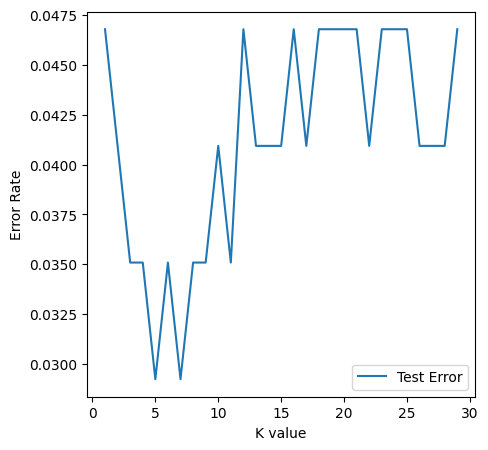

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),edgecolor='Black',dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K value')

In [21]:
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(scaled_x_train,y_train)
y_pred_1=knn_model.predict(scaled_x_test)

In [22]:
print(ac(y_test,y_pred_1),'\n')
print(cm(y_test,y_pred_1))

0.9649122807017544 

[[106   2]
 [  4  59]]


In [23]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [24]:
test_error_rates = []
for k in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(scaled_x_train,y_train)

  y_pred_test=knn.predict(scaled_x_test)

  test_error=1 - ac(y_test,y_pred_test)
  test_error_rates.append(test_error)

Text(0.5, 0, 'K value')

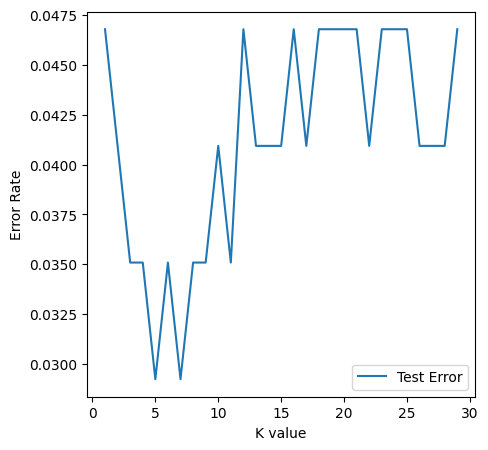

In [25]:
plt.figure(figsize=(5,5),edgecolor='Black',dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K value')